<center><h1>Modelamiento - Identificación de Usuario</header1></center>

Presentado por: Carlos Lucio, Luis Olalla  <br>
Fecha: 12/08/2022

# Importamos las librerias necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:

#importar libreria opencv para procesar las imágenes
import cv2
#libreria de cálculos numéricos
import numpy as np
#libreria dependiente de sistema operativo
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Libreria de coleccion de archivos
import shutil
#libreria para devolver rutas de archivos
import glob
#Libreria pandas para analisis de datos
import pandas as pd
#Libreria para graficar los datos
import matplotlib.pyplot as plt
#Libreria seaborn para distribuciones aleatorias
import seaborn as sn
#Libreria  de código abierto para aprendizaje automático 
from tensorflow.keras.utils import img_to_array,  array_to_img, img_to_array, load_img
#Libreria de redes neuronales para generar imagen
from keras.preprocessing.image import ImageDataGenerator
#Libreria que permite editar imagenes
from  PIL  import Image
#Libreria para remover el fondo
#from rembg import remove
#Libreria de tecnicas de aprendizaje automatico
from sklearn.preprocessing import MinMaxScaler
#Libreria que permite almacenar datos binarios
import h5py
#Libreria que permite retrasar la ejecucion
from time import sleep
#importar libreria pathlib
import pathlib
#libreria TF
import tensorflow as TF
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargar dataset

In [ ]:
#Código para cargar el Dataset
direccion = pathlib.Path(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset") #Direccion de la ruta principal
tamanio_lote = 16 #tamanio del lote
img_alto = 32 #alto de la imagen
img_ancho = 32 #ancho de la i
dsFotos = TF.keras.preprocessing.image_dataset_from_directory(
    direccion,label_mode="categorical")

Found 260 files belonging to 26 classes.


## Listar las clases del dataset

In [ ]:
#Código para cargar el Dataset
#Ruta del dataset de las imagenes principales
images_path = "/content/drive/MyDrive/Dataset_Aumentado_SinFondo"
#cargar la ruta del dataset
class_names = os.listdir(images_path)
#Ordenar los nombres de las clases
class_names.sort()
#imprimir los nombres de las clases
print(class_names)

['ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja']


In [ ]:
#for para recorrer el nombre de la clase
for class_name in class_names:
    #Seleccionar la ruta y el nombre de la clase
    cur_path = images_path + "/" + class_name
    #listar los elementos en la ruta actual
    elements = os.listdir(cur_path)
    
    #For para recorrer a los elementos 
    for element in elements:
        #Copiar las imagenes del dataset
        print("Copying Image - {} in Dataset/{}".format(element, class_name))
        #Especificar el origen de las iamgenes
        src = os.path.join(images_path + "/" + class_name, element) # origen
        #Destino de las imagenes copiadas
        dst = os.path.join("./Dataset_Aumentado/" + class_name, element) 
        #coleccionar cada archivo
        shutil.copy(src, dst)

Copying Image - L00376418_1.jpg in Dataset/ArielChabla
Copying Image - L00376418_10.jpg in Dataset/ArielChabla
Copying Image - L00376418_2.jpg in Dataset/ArielChabla
Copying Image - L00376418_3.jpg in Dataset/ArielChabla
Copying Image - L00376418_4.jpg in Dataset/ArielChabla
Copying Image - L00376418_5.jpg in Dataset/ArielChabla
Copying Image - L00376418_6.jpg in Dataset/ArielChabla
Copying Image - L00376418_7.jpg in Dataset/ArielChabla
Copying Image - L00376418_8.jpg in Dataset/ArielChabla
Copying Image - L00376418_9.jpg in Dataset/ArielChabla
Copying Image - L00385770_1.jpg in Dataset/ArroboMercy
Copying Image - L00385770_10.jpg in Dataset/ArroboMercy
Copying Image - L00385770_2.jpg in Dataset/ArroboMercy
Copying Image - L00385770_3.jpg in Dataset/ArroboMercy
Copying Image - L00385770_4.jpg in Dataset/ArroboMercy
Copying Image - L00385770_5.jpg in Dataset/ArroboMercy
Copying Image - L00385770_6.jpg in Dataset/ArroboMercy
Copying Image - L00385770_7.jpg in Dataset/ArroboMercy
Copying 

Copying Image - L00073392_2 - copia.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_2.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_3.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_4.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_5.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_6.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_7.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_8.jpg in Dataset/MosqueraLucy
Copying Image - L00073392_9.jpg in Dataset/MosqueraLucy
Copying Image - L00380424_1.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_10.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_2.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_3.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_4.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_5.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_6.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_7.jpg in Dataset/NatalyAcosta
Copying Image - L00380424_8.jpg in Data

In [ ]:
#Generador de aumento de imagenes
datagen = ImageDataGenerator(
    #rotacion del rango de imagen
        rotation_range=0.3,
    #Desplazamiento ancho de rango
        width_shift_range=0.2,
    #Rango desplazamiento altura
        height_shift_range=0,
    #Reescalar
        rescale=1./255,
    #Rango de corte
        shear_range=0.2,
    #Rango de enfoque
        zoom_range=0.2,
    #Volteo horizontal
        horizontal_flip=False,)

# **Aumento de datos**

**CLASE ARIEL CHABLA**

In [ ]:
#Ruta de la clase Ariel Chabla
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\ArielChabla")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'ArielChabla', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE MERCY ARROBO**

In [ ]:
#Ruta de la clase Mercy Arrobo
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\ArroboMercy")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'ArroboMercy', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE STEVEN BARRAGAN**

In [ ]:
#Ruta de la clase Steven Barragan
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\BarraganSteven")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'BarraganSteven', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE JOAN CEVALLOS**

In [ ]:
#Ruta de la clase Joan Cevallos
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\CevallosJoan")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'CevallosJoan', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE SELENA ENRIQUEZ**

In [ ]:
#Ruta de la clase Selena Enriquez
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\EnriquezSelena")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'EnriquezSelena', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE GENESIS HEREDIA**

In [ ]:
#Ruta de la clase Genesis Heredia
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\GenesisHeredia")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'GenesisHeredia', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE ANTHONY GOYES**

In [ ]:
#Ruta de la clase Anthony Goyes
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\GoyesAnthony")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'GoyesAnthony', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE HECTOR CEDEÑO**

In [ ]:
#Ruta de la clase Hector Cedeño
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\HectorCedeno")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'HectorCedeno', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE JHON ZAMBRANO**

In [ ]:
#Ruta de la clase Jhon Zambrano
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\JhonZambrano")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'JhonZambrano', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE JORDAN ESPINOSA**

In [ ]:
#Ruta de la clase Jordan Espinosa
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\JordanEspinosa")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'JordanEspinosa', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE JORGE BORRERO**

In [ ]:
#Ruta de la clase Jorge Borrero
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\JorgeBorrero")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'JorgeBorrero', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE JOSE RUIZ**

In [ ]:
#Ruta de la clase Jhon Zambrano
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\JoseRuiz")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'JoseRuiz', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE CARLOS LUCIO**

In [ ]:
#Ruta de la clase Carlos Lucio
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\LucioCarlos")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'LucioCarlos', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE FERNANDO MASACHE**

In [ ]:
#Ruta de la clase Fernando Masache
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\MasacheFernando")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'MasacheFernando', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE MELANY LOPEZ**

In [ ]:
#Ruta de la clase Melany Lopez
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\MelanyLopez")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'MelanyLopez', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE LUCY MOSQUERA**

In [ ]:
#Ruta de la clase Lucy Mosquera
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\MosqueraLucy")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'MosqueraLucy', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE NATALY ACOSTA**

In [ ]:
#Ruta de la clase Nataly Acosta
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\NatalyAcosta")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'NatalyAcosta', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE LUIS OLALLA**

In [ ]:
#Ruta de la clase Luis Olalla
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\OlallaLuis")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'OlallaLuis', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE MAJO PARRAGA**

In [ ]:
#Ruta de la clase Majo Parraga
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\ParragaMariaJose")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'ParragaMariaJose', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE KEVIN PAUTE**

In [ ]:
#Ruta de la clase Kevin Paute
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\PauteKevin")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'PauteKevin', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE RAYMON DÁVILA**

In [ ]:
#Ruta de la clase Raymon Dávila
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\RaymondDavila")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'RaymondDavila', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE SELENA RIVAS**

In [ ]:
#Ruta de la clase Selena Rivas
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\RivasSelena")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'RivasSelena', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE JOHANA SALAZAR**

In [ ]:
#Ruta de la clase Johana Salazar
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\SalazarJohana")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'SalazarJohana', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE WILMER SOLANO**

In [ ]:
#Ruta de la clase Wilmer Solano
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\SolanoWilmer")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'SolanoWilmer', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE BRYAN SOLORZANO**

In [ ]:
#Ruta de la clase Bryan Solornzano
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\SolorzanoBryan")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'SolorzanoBryan', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**CLASE VINICIO BORJA**

In [ ]:
#Ruta de la clase Jhon Zambrano
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3\Dataset_Aumentado\VinicioBorja")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # esta es una matriz Numpy con forma (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'VinicioBorja', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## crea 10 imagenes por imagen
            break 

**Resize**

In [ ]:
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in class_names:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = r"C:/Users/enrik/Documents/PROYECTOIAU3/Dataset_Aumentado/" + class_name #Coger la carpeta de aumento de datos
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        # Cargamos la imagen
        img = load_img(cur_path+"/"+element)
        # Creamos un array Numpy con forma(3, 150, 150)
        x = img_to_array(img)
        #Reescalamos la imagen
        x = cv2.resize(x, (192, 192))
        # Realisamos un remodelado de las imagen
        x = x.reshape((1,) + x.shape)
        # Inicializamos la variable i
        i = 0
        # Deginimos un bucle que almacenara las nuevas fotos creadas
        for batch in datagen.flow(x, batch_size=1,
                save_to_dir="C:/Users/enrik/Documents/PROYECTOIAU3/Dataset_Resize/"+class_name, 
                save_prefix= class_name, 
                save_format='jpg'):
            # Aumentamos el contador
            i += 1
            # Condición de detención del bucle
            if i == 1:
                #Fin del bucle
                break

# **Filtro NLM para eliminación de ruido de imagen**

In [ ]:
#Ruta principal del proyecto
os.chdir(r"C:\Users\enrik\Documents\PROYECTOIAU3")
#Ruta de las imagenes del dataset aumentado
images_path = "./Dataset_Resize"
#Listar la ruta de la clases e imagenes
class_names = os.listdir(images_path)
#Ordernar la clasificacion de los nombres
class_names.sort()
#Imprimir las clases
print(class_names)

['ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja']


In [ ]:
#clase para recorrer la ruta y el nombre de la clase
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1
#For para procesar la imagen con su formato
    for file in glob.glob(cur_path + "/*"):
        #Imprimir el titulo de la imagen
        print("Processing Image - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
      # imágenes de eliminación de ruido
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
       # guardar imágenes
        save_path = './Dataset_Aumentado_SinRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

   # mostrar actualización de bucle
        i += 1

Processing Image - 1 in ArielChabla
Processing Image - 2 in ArielChabla
Processing Image - 3 in ArielChabla
Processing Image - 4 in ArielChabla
Processing Image - 5 in ArielChabla
Processing Image - 6 in ArielChabla
Processing Image - 7 in ArielChabla
Processing Image - 8 in ArielChabla
Processing Image - 9 in ArielChabla
Processing Image - 10 in ArielChabla
Processing Image - 11 in ArielChabla
Processing Image - 12 in ArielChabla
Processing Image - 13 in ArielChabla
Processing Image - 14 in ArielChabla
Processing Image - 15 in ArielChabla
Processing Image - 16 in ArielChabla
Processing Image - 17 in ArielChabla
Processing Image - 18 in ArielChabla
Processing Image - 19 in ArielChabla
Processing Image - 20 in ArielChabla
Processing Image - 21 in ArielChabla
Processing Image - 22 in ArielChabla
Processing Image - 23 in ArielChabla
Processing Image - 24 in ArielChabla
Processing Image - 25 in ArielChabla
Processing Image - 26 in ArielChabla
Processing Image - 27 in ArielChabla
Processing

Processing Image - 22 in BarraganSteven
Processing Image - 23 in BarraganSteven
Processing Image - 24 in BarraganSteven
Processing Image - 25 in BarraganSteven
Processing Image - 26 in BarraganSteven
Processing Image - 27 in BarraganSteven
Processing Image - 28 in BarraganSteven
Processing Image - 29 in BarraganSteven
Processing Image - 30 in BarraganSteven
Processing Image - 31 in BarraganSteven
Processing Image - 32 in BarraganSteven
Processing Image - 33 in BarraganSteven
Processing Image - 34 in BarraganSteven
Processing Image - 35 in BarraganSteven
Processing Image - 36 in BarraganSteven
Processing Image - 37 in BarraganSteven
Processing Image - 38 in BarraganSteven
Processing Image - 39 in BarraganSteven
Processing Image - 40 in BarraganSteven
Processing Image - 41 in BarraganSteven
Processing Image - 42 in BarraganSteven
Processing Image - 43 in BarraganSteven
Processing Image - 44 in BarraganSteven
Processing Image - 45 in BarraganSteven
Processing Image - 46 in BarraganSteven


Processing Image - 33 in EnriquezSelena
Processing Image - 34 in EnriquezSelena
Processing Image - 35 in EnriquezSelena
Processing Image - 36 in EnriquezSelena
Processing Image - 37 in EnriquezSelena
Processing Image - 38 in EnriquezSelena
Processing Image - 39 in EnriquezSelena
Processing Image - 40 in EnriquezSelena
Processing Image - 41 in EnriquezSelena
Processing Image - 42 in EnriquezSelena
Processing Image - 43 in EnriquezSelena
Processing Image - 44 in EnriquezSelena
Processing Image - 45 in EnriquezSelena
Processing Image - 46 in EnriquezSelena
Processing Image - 47 in EnriquezSelena
Processing Image - 48 in EnriquezSelena
Processing Image - 49 in EnriquezSelena
Processing Image - 50 in EnriquezSelena
Processing Image - 51 in EnriquezSelena
Processing Image - 52 in EnriquezSelena
Processing Image - 53 in EnriquezSelena
Processing Image - 54 in EnriquezSelena
Processing Image - 55 in EnriquezSelena
Processing Image - 56 in EnriquezSelena
Processing Image - 57 in EnriquezSelena


Processing Image - 41 in GoyesAnthony
Processing Image - 42 in GoyesAnthony
Processing Image - 43 in GoyesAnthony
Processing Image - 44 in GoyesAnthony
Processing Image - 45 in GoyesAnthony
Processing Image - 46 in GoyesAnthony
Processing Image - 47 in GoyesAnthony
Processing Image - 48 in GoyesAnthony
Processing Image - 49 in GoyesAnthony
Processing Image - 50 in GoyesAnthony
Processing Image - 51 in GoyesAnthony
Processing Image - 52 in GoyesAnthony
Processing Image - 53 in GoyesAnthony
Processing Image - 54 in GoyesAnthony
Processing Image - 55 in GoyesAnthony
Processing Image - 56 in GoyesAnthony
Processing Image - 57 in GoyesAnthony
Processing Image - 58 in GoyesAnthony
Processing Image - 59 in GoyesAnthony
Processing Image - 60 in GoyesAnthony
Processing Image - 61 in GoyesAnthony
Processing Image - 62 in GoyesAnthony
Processing Image - 63 in GoyesAnthony
Processing Image - 64 in GoyesAnthony
Processing Image - 65 in GoyesAnthony
Processing Image - 66 in GoyesAnthony
Processing I

Processing Image - 58 in JhonZambrano
Processing Image - 59 in JhonZambrano
Processing Image - 60 in JhonZambrano
Processing Image - 61 in JhonZambrano
Processing Image - 62 in JhonZambrano
Processing Image - 63 in JhonZambrano
Processing Image - 64 in JhonZambrano
Processing Image - 65 in JhonZambrano
Processing Image - 66 in JhonZambrano
Processing Image - 67 in JhonZambrano
Processing Image - 68 in JhonZambrano
Processing Image - 69 in JhonZambrano
Processing Image - 70 in JhonZambrano
Processing Image - 71 in JhonZambrano
Processing Image - 72 in JhonZambrano
Processing Image - 73 in JhonZambrano
Processing Image - 74 in JhonZambrano
Processing Image - 75 in JhonZambrano
Processing Image - 76 in JhonZambrano
Processing Image - 77 in JhonZambrano
Processing Image - 78 in JhonZambrano
Processing Image - 79 in JhonZambrano
Processing Image - 80 in JhonZambrano
Processing Image - 81 in JhonZambrano
Processing Image - 82 in JhonZambrano
Processing Image - 83 in JhonZambrano
Processing I

Processing Image - 69 in JorgeBorrero
Processing Image - 70 in JorgeBorrero
Processing Image - 71 in JorgeBorrero
Processing Image - 72 in JorgeBorrero
Processing Image - 73 in JorgeBorrero
Processing Image - 74 in JorgeBorrero
Processing Image - 75 in JorgeBorrero
Processing Image - 76 in JorgeBorrero
Processing Image - 77 in JorgeBorrero
Processing Image - 78 in JorgeBorrero
Processing Image - 79 in JorgeBorrero
Processing Image - 80 in JorgeBorrero
Processing Image - 81 in JorgeBorrero
Processing Image - 82 in JorgeBorrero
Processing Image - 83 in JorgeBorrero
Processing Image - 84 in JorgeBorrero
Processing Image - 85 in JorgeBorrero
Processing Image - 86 in JorgeBorrero
Processing Image - 87 in JorgeBorrero
Processing Image - 88 in JorgeBorrero
Processing Image - 89 in JorgeBorrero
Processing Image - 90 in JorgeBorrero
Processing Image - 91 in JorgeBorrero
Processing Image - 92 in JorgeBorrero
Processing Image - 93 in JorgeBorrero
Processing Image - 94 in JorgeBorrero
Processing I

Processing Image - 99 in LucioCarlos
Processing Image - 100 in LucioCarlos
Processing Image - 1 in MasacheFernando
Processing Image - 2 in MasacheFernando
Processing Image - 3 in MasacheFernando
Processing Image - 4 in MasacheFernando
Processing Image - 5 in MasacheFernando
Processing Image - 6 in MasacheFernando
Processing Image - 7 in MasacheFernando
Processing Image - 8 in MasacheFernando
Processing Image - 9 in MasacheFernando
Processing Image - 10 in MasacheFernando
Processing Image - 11 in MasacheFernando
Processing Image - 12 in MasacheFernando
Processing Image - 13 in MasacheFernando
Processing Image - 14 in MasacheFernando
Processing Image - 15 in MasacheFernando
Processing Image - 16 in MasacheFernando
Processing Image - 17 in MasacheFernando
Processing Image - 18 in MasacheFernando
Processing Image - 19 in MasacheFernando
Processing Image - 20 in MasacheFernando
Processing Image - 21 in MasacheFernando
Processing Image - 22 in MasacheFernando
Processing Image - 23 in Masache

Processing Image - 11 in MosqueraLucy
Processing Image - 12 in MosqueraLucy
Processing Image - 13 in MosqueraLucy
Processing Image - 14 in MosqueraLucy
Processing Image - 15 in MosqueraLucy
Processing Image - 16 in MosqueraLucy
Processing Image - 17 in MosqueraLucy
Processing Image - 18 in MosqueraLucy
Processing Image - 19 in MosqueraLucy
Processing Image - 20 in MosqueraLucy
Processing Image - 21 in MosqueraLucy
Processing Image - 22 in MosqueraLucy
Processing Image - 23 in MosqueraLucy
Processing Image - 24 in MosqueraLucy
Processing Image - 25 in MosqueraLucy
Processing Image - 26 in MosqueraLucy
Processing Image - 27 in MosqueraLucy
Processing Image - 28 in MosqueraLucy
Processing Image - 29 in MosqueraLucy
Processing Image - 30 in MosqueraLucy
Processing Image - 31 in MosqueraLucy
Processing Image - 32 in MosqueraLucy
Processing Image - 33 in MosqueraLucy
Processing Image - 34 in MosqueraLucy
Processing Image - 35 in MosqueraLucy
Processing Image - 36 in MosqueraLucy
Processing I

Processing Image - 29 in OlallaLuis
Processing Image - 30 in OlallaLuis
Processing Image - 31 in OlallaLuis
Processing Image - 32 in OlallaLuis
Processing Image - 33 in OlallaLuis
Processing Image - 34 in OlallaLuis
Processing Image - 35 in OlallaLuis
Processing Image - 36 in OlallaLuis
Processing Image - 37 in OlallaLuis
Processing Image - 38 in OlallaLuis
Processing Image - 39 in OlallaLuis
Processing Image - 40 in OlallaLuis
Processing Image - 41 in OlallaLuis
Processing Image - 42 in OlallaLuis
Processing Image - 43 in OlallaLuis
Processing Image - 44 in OlallaLuis
Processing Image - 45 in OlallaLuis
Processing Image - 46 in OlallaLuis
Processing Image - 47 in OlallaLuis
Processing Image - 48 in OlallaLuis
Processing Image - 49 in OlallaLuis
Processing Image - 50 in OlallaLuis
Processing Image - 51 in OlallaLuis
Processing Image - 52 in OlallaLuis
Processing Image - 53 in OlallaLuis
Processing Image - 54 in OlallaLuis
Processing Image - 55 in OlallaLuis
Processing Image - 56 in Ola

Processing Image - 41 in PauteKevin
Processing Image - 42 in PauteKevin
Processing Image - 43 in PauteKevin
Processing Image - 44 in PauteKevin
Processing Image - 45 in PauteKevin
Processing Image - 46 in PauteKevin
Processing Image - 47 in PauteKevin
Processing Image - 48 in PauteKevin
Processing Image - 49 in PauteKevin
Processing Image - 50 in PauteKevin
Processing Image - 51 in PauteKevin
Processing Image - 52 in PauteKevin
Processing Image - 53 in PauteKevin
Processing Image - 54 in PauteKevin
Processing Image - 55 in PauteKevin
Processing Image - 56 in PauteKevin
Processing Image - 57 in PauteKevin
Processing Image - 58 in PauteKevin
Processing Image - 59 in PauteKevin
Processing Image - 60 in PauteKevin
Processing Image - 61 in PauteKevin
Processing Image - 62 in PauteKevin
Processing Image - 63 in PauteKevin
Processing Image - 64 in PauteKevin
Processing Image - 65 in PauteKevin
Processing Image - 66 in PauteKevin
Processing Image - 67 in PauteKevin
Processing Image - 68 in Pau

Processing Image - 60 in RivasSelena
Processing Image - 61 in RivasSelena
Processing Image - 62 in RivasSelena
Processing Image - 63 in RivasSelena
Processing Image - 64 in RivasSelena
Processing Image - 65 in RivasSelena
Processing Image - 66 in RivasSelena
Processing Image - 67 in RivasSelena
Processing Image - 68 in RivasSelena
Processing Image - 69 in RivasSelena
Processing Image - 70 in RivasSelena
Processing Image - 71 in RivasSelena
Processing Image - 72 in RivasSelena
Processing Image - 73 in RivasSelena
Processing Image - 74 in RivasSelena
Processing Image - 75 in RivasSelena
Processing Image - 76 in RivasSelena
Processing Image - 77 in RivasSelena
Processing Image - 78 in RivasSelena
Processing Image - 79 in RivasSelena
Processing Image - 80 in RivasSelena
Processing Image - 81 in RivasSelena
Processing Image - 82 in RivasSelena
Processing Image - 83 in RivasSelena
Processing Image - 84 in RivasSelena
Processing Image - 85 in RivasSelena
Processing Image - 86 in RivasSelena
P

Processing Image - 75 in SolanoWilmer
Processing Image - 76 in SolanoWilmer
Processing Image - 77 in SolanoWilmer
Processing Image - 78 in SolanoWilmer
Processing Image - 79 in SolanoWilmer
Processing Image - 80 in SolanoWilmer
Processing Image - 81 in SolanoWilmer
Processing Image - 82 in SolanoWilmer
Processing Image - 83 in SolanoWilmer
Processing Image - 84 in SolanoWilmer
Processing Image - 85 in SolanoWilmer
Processing Image - 86 in SolanoWilmer
Processing Image - 87 in SolanoWilmer
Processing Image - 88 in SolanoWilmer
Processing Image - 89 in SolanoWilmer
Processing Image - 90 in SolanoWilmer
Processing Image - 91 in SolanoWilmer
Processing Image - 92 in SolanoWilmer
Processing Image - 93 in SolanoWilmer
Processing Image - 94 in SolanoWilmer
Processing Image - 95 in SolanoWilmer
Processing Image - 96 in SolanoWilmer
Processing Image - 97 in SolanoWilmer
Processing Image - 98 in SolanoWilmer
Processing Image - 99 in SolanoWilmer
Processing Image - 100 in SolanoWilmer
Processing 

Processing Image - 86 in VinicioBorja
Processing Image - 87 in VinicioBorja
Processing Image - 88 in VinicioBorja
Processing Image - 89 in VinicioBorja
Processing Image - 90 in VinicioBorja
Processing Image - 91 in VinicioBorja
Processing Image - 92 in VinicioBorja
Processing Image - 93 in VinicioBorja
Processing Image - 94 in VinicioBorja
Processing Image - 95 in VinicioBorja
Processing Image - 96 in VinicioBorja
Processing Image - 97 in VinicioBorja
Processing Image - 98 in VinicioBorja
Processing Image - 99 in VinicioBorja
Processing Image - 100 in VinicioBorja


# **Eliminación de fondo**

In [ ]:
#Ruta de la carpeta de las imagenes sin ruido
images_path = "./Dataset_Aumentado_SinRuido"
#Directorio de las imagenes
class_names = os.listdir(images_path)
#Ordenar la clasificacion de los nombres
class_names.sort()
#Imprimir las clases de nombres
print(class_names)

In [ ]:
#clase para recorrer la ruta y el nombre de la clase
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1
#For para procesar la imagen con su formato
    for file in glob.glob(cur_path + "/*"):
            #Imprimir el titulo de la imagen
        print("Processing Image - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
      # eliminar bg
        output = remove(image)
       # guardar imágenes
        save_path = './Dataset_Aumentado_SinFondo/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

      # mostrar actualización de bucle
        i += 1

Processing Image - 1 in ArielChabla
Processing Image - 2 in ArielChabla
Processing Image - 3 in ArielChabla
Processing Image - 4 in ArielChabla
Processing Image - 5 in ArielChabla
Processing Image - 6 in ArielChabla
Processing Image - 7 in ArielChabla
Processing Image - 8 in ArielChabla
Processing Image - 9 in ArielChabla
Processing Image - 10 in ArielChabla
Processing Image - 11 in ArielChabla
Processing Image - 12 in ArielChabla
Processing Image - 13 in ArielChabla
Processing Image - 14 in ArielChabla
Processing Image - 15 in ArielChabla
Processing Image - 16 in ArielChabla
Processing Image - 17 in ArielChabla
Processing Image - 18 in ArielChabla
Processing Image - 19 in ArielChabla
Processing Image - 20 in ArielChabla
Processing Image - 21 in ArielChabla
Processing Image - 22 in ArielChabla
Processing Image - 23 in ArielChabla
Processing Image - 24 in ArielChabla
Processing Image - 25 in ArielChabla
Processing Image - 26 in ArielChabla
Processing Image - 27 in ArielChabla
Processing

Processing Image - 22 in BarraganSteven
Processing Image - 23 in BarraganSteven
Processing Image - 24 in BarraganSteven
Processing Image - 25 in BarraganSteven
Processing Image - 26 in BarraganSteven
Processing Image - 27 in BarraganSteven
Processing Image - 28 in BarraganSteven
Processing Image - 29 in BarraganSteven
Processing Image - 30 in BarraganSteven
Processing Image - 31 in BarraganSteven
Processing Image - 32 in BarraganSteven
Processing Image - 33 in BarraganSteven
Processing Image - 34 in BarraganSteven
Processing Image - 35 in BarraganSteven
Processing Image - 36 in BarraganSteven
Processing Image - 37 in BarraganSteven
Processing Image - 38 in BarraganSteven
Processing Image - 39 in BarraganSteven
Processing Image - 40 in BarraganSteven
Processing Image - 41 in BarraganSteven
Processing Image - 42 in BarraganSteven
Processing Image - 43 in BarraganSteven
Processing Image - 44 in BarraganSteven
Processing Image - 45 in BarraganSteven
Processing Image - 46 in BarraganSteven


Processing Image - 33 in EnriquezSelena
Processing Image - 34 in EnriquezSelena
Processing Image - 35 in EnriquezSelena
Processing Image - 36 in EnriquezSelena
Processing Image - 37 in EnriquezSelena
Processing Image - 38 in EnriquezSelena
Processing Image - 39 in EnriquezSelena
Processing Image - 40 in EnriquezSelena
Processing Image - 41 in EnriquezSelena
Processing Image - 42 in EnriquezSelena
Processing Image - 43 in EnriquezSelena
Processing Image - 44 in EnriquezSelena
Processing Image - 45 in EnriquezSelena
Processing Image - 46 in EnriquezSelena
Processing Image - 47 in EnriquezSelena
Processing Image - 48 in EnriquezSelena
Processing Image - 49 in EnriquezSelena
Processing Image - 50 in EnriquezSelena
Processing Image - 51 in EnriquezSelena
Processing Image - 52 in EnriquezSelena
Processing Image - 53 in EnriquezSelena
Processing Image - 54 in EnriquezSelena
Processing Image - 55 in EnriquezSelena
Processing Image - 56 in EnriquezSelena
Processing Image - 57 in EnriquezSelena


Processing Image - 41 in GoyesAnthony
Processing Image - 42 in GoyesAnthony
Processing Image - 43 in GoyesAnthony
Processing Image - 44 in GoyesAnthony
Processing Image - 45 in GoyesAnthony
Processing Image - 46 in GoyesAnthony
Processing Image - 47 in GoyesAnthony
Processing Image - 48 in GoyesAnthony
Processing Image - 49 in GoyesAnthony
Processing Image - 50 in GoyesAnthony
Processing Image - 51 in GoyesAnthony
Processing Image - 52 in GoyesAnthony
Processing Image - 53 in GoyesAnthony
Processing Image - 54 in GoyesAnthony
Processing Image - 55 in GoyesAnthony
Processing Image - 56 in GoyesAnthony
Processing Image - 57 in GoyesAnthony
Processing Image - 58 in GoyesAnthony
Processing Image - 59 in GoyesAnthony
Processing Image - 60 in GoyesAnthony
Processing Image - 61 in GoyesAnthony
Processing Image - 62 in GoyesAnthony
Processing Image - 63 in GoyesAnthony
Processing Image - 64 in GoyesAnthony
Processing Image - 65 in GoyesAnthony
Processing Image - 66 in GoyesAnthony
Processing I

Processing Image - 58 in JhonZambrano
Processing Image - 59 in JhonZambrano
Processing Image - 60 in JhonZambrano
Processing Image - 61 in JhonZambrano
Processing Image - 62 in JhonZambrano
Processing Image - 63 in JhonZambrano
Processing Image - 64 in JhonZambrano
Processing Image - 65 in JhonZambrano
Processing Image - 66 in JhonZambrano
Processing Image - 67 in JhonZambrano
Processing Image - 68 in JhonZambrano
Processing Image - 69 in JhonZambrano
Processing Image - 70 in JhonZambrano
Processing Image - 71 in JhonZambrano
Processing Image - 72 in JhonZambrano
Processing Image - 73 in JhonZambrano
Processing Image - 74 in JhonZambrano
Processing Image - 75 in JhonZambrano
Processing Image - 76 in JhonZambrano
Processing Image - 77 in JhonZambrano
Processing Image - 78 in JhonZambrano
Processing Image - 79 in JhonZambrano
Processing Image - 80 in JhonZambrano
Processing Image - 81 in JhonZambrano
Processing Image - 82 in JhonZambrano
Processing Image - 83 in JhonZambrano
Processing I

Processing Image - 69 in JorgeBorrero
Processing Image - 70 in JorgeBorrero
Processing Image - 71 in JorgeBorrero
Processing Image - 72 in JorgeBorrero
Processing Image - 73 in JorgeBorrero
Processing Image - 74 in JorgeBorrero
Processing Image - 75 in JorgeBorrero
Processing Image - 76 in JorgeBorrero
Processing Image - 77 in JorgeBorrero
Processing Image - 78 in JorgeBorrero
Processing Image - 79 in JorgeBorrero
Processing Image - 80 in JorgeBorrero
Processing Image - 81 in JorgeBorrero
Processing Image - 82 in JorgeBorrero
Processing Image - 83 in JorgeBorrero
Processing Image - 84 in JorgeBorrero
Processing Image - 85 in JorgeBorrero
Processing Image - 86 in JorgeBorrero
Processing Image - 87 in JorgeBorrero
Processing Image - 88 in JorgeBorrero
Processing Image - 89 in JorgeBorrero
Processing Image - 90 in JorgeBorrero
Processing Image - 91 in JorgeBorrero
Processing Image - 92 in JorgeBorrero
Processing Image - 93 in JorgeBorrero
Processing Image - 94 in JorgeBorrero
Processing I

Processing Image - 99 in LucioCarlos
Processing Image - 100 in LucioCarlos
Processing Image - 1 in MasacheFernando
Processing Image - 2 in MasacheFernando
Processing Image - 3 in MasacheFernando
Processing Image - 4 in MasacheFernando
Processing Image - 5 in MasacheFernando
Processing Image - 6 in MasacheFernando
Processing Image - 7 in MasacheFernando
Processing Image - 8 in MasacheFernando
Processing Image - 9 in MasacheFernando
Processing Image - 10 in MasacheFernando
Processing Image - 11 in MasacheFernando
Processing Image - 12 in MasacheFernando
Processing Image - 13 in MasacheFernando
Processing Image - 14 in MasacheFernando
Processing Image - 15 in MasacheFernando
Processing Image - 16 in MasacheFernando
Processing Image - 17 in MasacheFernando
Processing Image - 18 in MasacheFernando
Processing Image - 19 in MasacheFernando
Processing Image - 20 in MasacheFernando
Processing Image - 21 in MasacheFernando
Processing Image - 22 in MasacheFernando
Processing Image - 23 in Masache

Processing Image - 11 in MosqueraLucy
Processing Image - 12 in MosqueraLucy
Processing Image - 13 in MosqueraLucy
Processing Image - 14 in MosqueraLucy
Processing Image - 15 in MosqueraLucy
Processing Image - 16 in MosqueraLucy
Processing Image - 17 in MosqueraLucy
Processing Image - 18 in MosqueraLucy
Processing Image - 19 in MosqueraLucy
Processing Image - 20 in MosqueraLucy
Processing Image - 21 in MosqueraLucy
Processing Image - 22 in MosqueraLucy
Processing Image - 23 in MosqueraLucy
Processing Image - 24 in MosqueraLucy
Processing Image - 25 in MosqueraLucy
Processing Image - 26 in MosqueraLucy
Processing Image - 27 in MosqueraLucy
Processing Image - 28 in MosqueraLucy
Processing Image - 29 in MosqueraLucy
Processing Image - 30 in MosqueraLucy
Processing Image - 31 in MosqueraLucy
Processing Image - 32 in MosqueraLucy
Processing Image - 33 in MosqueraLucy
Processing Image - 34 in MosqueraLucy
Processing Image - 35 in MosqueraLucy
Processing Image - 36 in MosqueraLucy
Processing I

Processing Image - 29 in OlallaLuis
Processing Image - 30 in OlallaLuis
Processing Image - 31 in OlallaLuis
Processing Image - 32 in OlallaLuis
Processing Image - 33 in OlallaLuis
Processing Image - 34 in OlallaLuis
Processing Image - 35 in OlallaLuis
Processing Image - 36 in OlallaLuis
Processing Image - 37 in OlallaLuis
Processing Image - 38 in OlallaLuis
Processing Image - 39 in OlallaLuis
Processing Image - 40 in OlallaLuis
Processing Image - 41 in OlallaLuis
Processing Image - 42 in OlallaLuis
Processing Image - 43 in OlallaLuis
Processing Image - 44 in OlallaLuis
Processing Image - 45 in OlallaLuis
Processing Image - 46 in OlallaLuis
Processing Image - 47 in OlallaLuis
Processing Image - 48 in OlallaLuis
Processing Image - 49 in OlallaLuis
Processing Image - 50 in OlallaLuis
Processing Image - 51 in OlallaLuis
Processing Image - 52 in OlallaLuis
Processing Image - 53 in OlallaLuis
Processing Image - 54 in OlallaLuis
Processing Image - 55 in OlallaLuis
Processing Image - 56 in Ola

Processing Image - 41 in PauteKevin
Processing Image - 42 in PauteKevin
Processing Image - 43 in PauteKevin
Processing Image - 44 in PauteKevin
Processing Image - 45 in PauteKevin
Processing Image - 46 in PauteKevin
Processing Image - 47 in PauteKevin
Processing Image - 48 in PauteKevin
Processing Image - 49 in PauteKevin
Processing Image - 50 in PauteKevin
Processing Image - 51 in PauteKevin
Processing Image - 52 in PauteKevin
Processing Image - 53 in PauteKevin
Processing Image - 54 in PauteKevin
Processing Image - 55 in PauteKevin
Processing Image - 56 in PauteKevin
Processing Image - 57 in PauteKevin
Processing Image - 58 in PauteKevin
Processing Image - 59 in PauteKevin
Processing Image - 60 in PauteKevin
Processing Image - 61 in PauteKevin
Processing Image - 62 in PauteKevin
Processing Image - 63 in PauteKevin
Processing Image - 64 in PauteKevin
Processing Image - 65 in PauteKevin
Processing Image - 66 in PauteKevin
Processing Image - 67 in PauteKevin
Processing Image - 68 in Pau

Processing Image - 60 in RivasSelena
Processing Image - 61 in RivasSelena
Processing Image - 62 in RivasSelena
Processing Image - 63 in RivasSelena
Processing Image - 64 in RivasSelena
Processing Image - 65 in RivasSelena
Processing Image - 66 in RivasSelena
Processing Image - 67 in RivasSelena
Processing Image - 68 in RivasSelena
Processing Image - 69 in RivasSelena
Processing Image - 70 in RivasSelena
Processing Image - 71 in RivasSelena
Processing Image - 72 in RivasSelena
Processing Image - 73 in RivasSelena
Processing Image - 74 in RivasSelena
Processing Image - 75 in RivasSelena
Processing Image - 76 in RivasSelena
Processing Image - 77 in RivasSelena
Processing Image - 78 in RivasSelena
Processing Image - 79 in RivasSelena
Processing Image - 80 in RivasSelena
Processing Image - 81 in RivasSelena
Processing Image - 82 in RivasSelena
Processing Image - 83 in RivasSelena
Processing Image - 84 in RivasSelena
Processing Image - 85 in RivasSelena
Processing Image - 86 in RivasSelena
P

Processing Image - 75 in SolanoWilmer
Processing Image - 76 in SolanoWilmer
Processing Image - 77 in SolanoWilmer
Processing Image - 78 in SolanoWilmer
Processing Image - 79 in SolanoWilmer
Processing Image - 80 in SolanoWilmer
Processing Image - 81 in SolanoWilmer
Processing Image - 82 in SolanoWilmer
Processing Image - 83 in SolanoWilmer
Processing Image - 84 in SolanoWilmer
Processing Image - 85 in SolanoWilmer
Processing Image - 86 in SolanoWilmer
Processing Image - 87 in SolanoWilmer
Processing Image - 88 in SolanoWilmer
Processing Image - 89 in SolanoWilmer
Processing Image - 90 in SolanoWilmer
Processing Image - 91 in SolanoWilmer
Processing Image - 92 in SolanoWilmer
Processing Image - 93 in SolanoWilmer
Processing Image - 94 in SolanoWilmer
Processing Image - 95 in SolanoWilmer
Processing Image - 96 in SolanoWilmer
Processing Image - 97 in SolanoWilmer
Processing Image - 98 in SolanoWilmer
Processing Image - 99 in SolanoWilmer
Processing Image - 100 in SolanoWilmer
Processing 

Processing Image - 86 in VinicioBorja
Processing Image - 87 in VinicioBorja
Processing Image - 88 in VinicioBorja
Processing Image - 89 in VinicioBorja
Processing Image - 90 in VinicioBorja
Processing Image - 91 in VinicioBorja
Processing Image - 92 in VinicioBorja
Processing Image - 93 in VinicioBorja
Processing Image - 94 in VinicioBorja
Processing Image - 95 in VinicioBorja
Processing Image - 96 in VinicioBorja
Processing Image - 97 in VinicioBorja
Processing Image - 98 in VinicioBorja
Processing Image - 99 in VinicioBorja
Processing Image - 100 in VinicioBorja


## Segunda parte Modelo

In [ ]:
#libreria dependiente de sistema operativo
import os
#Libreria opencv para preprocesar imagenes
import cv2
#Libreria para calculos numericos
import numpy as np
#Libreria que permite editar imagenes
from PIL import Image
#Libreria para graficar los datos
import matplotlib.pyplot as plt
#Libreria para entrenar los datos
from sklearn.model_selection import train_test_split
#Libreria del entorno de trabajo
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Libreria para poner etiquetas de tensorflow
from tensorflow.keras.utils import to_categorical
#libreria para red convolucional de keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
#Libreria para utilizar modelos y layers
from tensorflow.keras import layers, models
#Libreria para detencion temprana
from tensorflow.keras.callbacks import EarlyStopping
#Libreria de tensorflow
import tensorflow as tf
#Metricas de evaluacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Carga y exploración de datos

In [ ]:
#Ruta de la carpeta de imagenes sin fondo
fpath = '/content/drive/MyDrive/Dataset_Aumentado_SinFondo'
#Generador de numeros aleatorios
random_seed = 9
#Listar categorias de imagenes sin fondo
categories = os.listdir(fpath)
#Mostrar las categorias y su orden
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['PauteKevin', 'SalazarJohana', 'RivasSelena', 'RaymondDavila', 'VinicioBorja', 'ParragaMariaJose', 'OlallaLuis', 'NatalyAcosta', 'SolanoWilmer', 'SolorzanoBryan', 'ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy'] 

No. of categories =  26


In [ ]:
 """
    load_images_and_labels permite recorrer las categorias y la carga de imagenes. 

    Parametros
  
        categories: Da acceso a la ruta en donde esta cada imagen con su titulo.
        

    Retorna:
        img_lst: Es la lista de imagenes.
        labels: Es la lista etiquetas.
"""
def load_images_and_labels(categories):
    #Array de lista de imagenes
    img_lst=[]
    #Array de lista de etiquetas
    labels=[]
    #For para enumerar a las categorias
    for index, category in enumerate(categories):
        #For para para recorrer la ruta y ctaegoria
        for image_name in os.listdir(fpath+"/"+category):
            #Procesar cada imagen con categoria
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            #Dar color a la imagen
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #Array con formato de imagen
            img_array = Image.fromarray(img, 'RGB')
            #Añadir imagen al array
            img_lst.append(np.array(img_array))
            #Indice de etiquetas
            labels.append(index)
    return img_lst, labels
#Retornar imagenes y etiquetas
images, labels = load_images_and_labels(categories)
#Mostrar el numero de  imagenes cargadas y las etiquetas
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  2600 
No. of labels loaded =  2600
<class 'list'> <class 'list'>


In [ ]:
#Metricas de medidas de imagenes y etiquetas
images = np.array(images)
labels = np.array(labels)
#Mostrar las medidas de etiquetas e imagenes
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
#Mostrar el arreglo
print(type(images),type(labels))

Images shape =  (2600, 192, 192, 3) 
Labels shape =  (2600,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


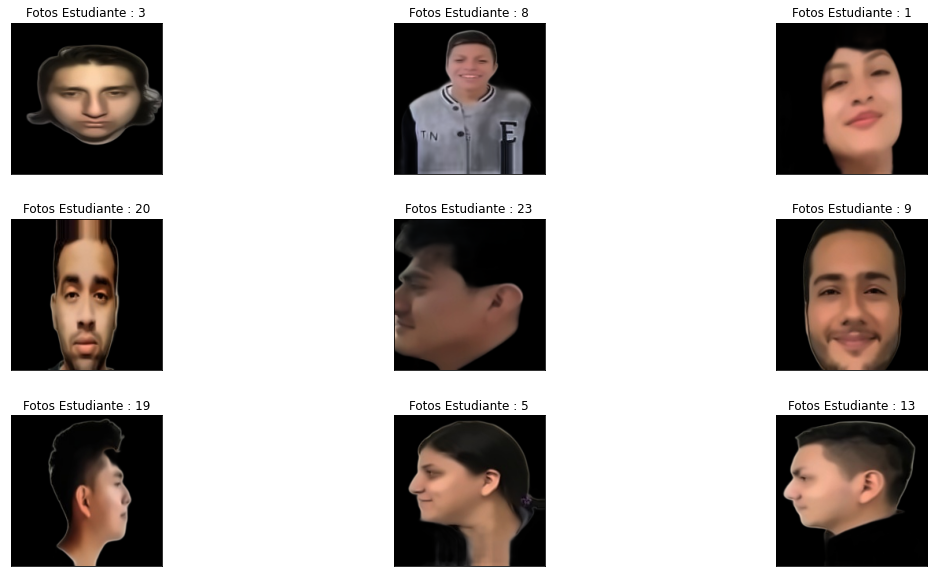

In [ ]:
 """
    Display_rand_imagenes, permite mostrar imagenes aleatorias.

  Variables
  
  images: Imagenes seleccionadas
  labels: Etiquetas seleccionadas
  
"""
def display_rand_images(images, labels):
    #Metricas de la figura
    plt.figure(1 , figsize = (19 , 10))
    #Contador
    n = 0 
    #for que recorre el rango 
    for i in range(9):
        #Aumento al contador
        n += 1 
        #Numero de imagen aleatorio
        r = np.random.randint(0 , images.shape[0] , 1)
        #Presentacion de la imagen de 3 en 3
        plt.subplot(3 , 3 , n)
        #Espaciado de la imagen
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        #Mostrar las imagenes
        plt.imshow(images[r[0]])
        #Dar un titulo a la imagen
        plt.title('Fotos Estudiante : {}'.format(labels[r[0]]))
        #Medida de x
        plt.xticks([])
        #medida de y
        plt.yticks([])
    #Generar la grafica
    plt.show()
#Imagenes y etiqueta
display_rand_images(images, labels)

## Prepare data for training the CNN model

In [ ]:
#El paso n.º 1 en la reorganización de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
#Valores antes de arrastrar 
print("'n' values before shuffling = ",n)

#shuffle todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
#Dar valores aleatorios de arrasterarmiento
np.random.shuffle(n)
#Mostrar valores despues de arrastrar
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 2597 2598 2599]

'n' values after shuffling =  [1740 1738 1000 ...  501  348  382]


In [ ]:
#2-paso en el barajado de datos
#imágenes aleatorias y datos de etiquetas correspondientes en ambas listas

images = images[n]
labels = labels[n]
#Imagenes despues de arrastrar y etiquetas despues de arrastrar
print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (2600, 192, 192, 3) 
Labels shape after shuffling =  (2600,)


In [ ]:
#Cambiar el formato de imagenes
images = images.astype(np.float32)
#Cambiar el formato de etiquetas
labels = labels.astype(np.int32)
#Division de los valores a 255
images = images/255
#Mostrar las imagenes despues de normalizar
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (2600, 192, 192, 3)


In [ ]:
#Dar los datos de prueba y entrenamiento
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
#Forma de las imagenes de entreamiento
print("train_ds shape = ",train_ds.shape)
#Forma de las etiquetas de entrenamiento
print("train_labels shape = ",train_labels.shape)
#Forma de las imagenes de prueba
print("\ntest_ds shape = ",test_ds.shape)
#Forma de las etiquetas de prueba
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (2080, 192, 192, 3)
train_labels shape =  (2080,)

test_ds shape =  (520, 192, 192, 3)
test_labels shape =  (520,)


In [ ]:

#Dar tamaño de 227 a las imagenes de entrenamiento
train_ds = tf.image.resize(train_ds, (227, 227))
#Dar tamaño de 227 a las imagenes de prueba
test_ds = tf.image.resize(test_ds, (227, 227))



## Modelo AlexNet. 


## Librerias . 

In [ ]:
#Libreria de tensorflow
from tensorflow import keras
#Libreria secuencial de keras
from keras.models import Sequential
#Libreria de keras para redes convolucionales
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#Libreria de tensorflow para normalizacion
from tensorflow.keras.layers import BatchNormalization


In [ ]:
#Código que responde a la descripción anterior
#Instanciamos el modelo
model=Sequential()
#Primera capa convolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
# Primera capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
model.add(BatchNormalization())
#2 Segunda capa convolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
#2 Segunda  capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
model.add(BatchNormalization())
# Tercera capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
# Cuarta capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#Quinta capa convolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#Tercers capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion pro lote
model.add(BatchNormalization())
#Redimensionar el modelo AlexNet
model.add(Flatten())
#Primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
#regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lote
model.add(BatchNormalization())
#Segunda capa de densidad
model.add(Dense(4096,activation="relu"))
#Regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lotes
model.add(BatchNormalization())
#Tercera capa de densidad
model.add(Dense(1000,activation="relu"))
#regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lote
model.add(BatchNormalization())
#capa de salida
model.add(Dense(26,activation="softmax"))
#resumen
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

## Modelo Compilado

In [ ]:
#compilacion del modelo AlexNet
#compilacion del modelo AlexNet
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

## Entrenar el modelo

In [ ]:
#Importamos las librerias necesarias para aplicar el entrenamiento del mdodelo
from keras.wrappers.scikit_learn import KerasClassifier
#Importar GridSearch
from sklearn.model_selection import GridSearchCV
#Generar un arreglo para la optimización
optimizer = ['Adam', 'Adamax', 'Nadam']
#Asignación de las épocas
epochs = [10, 50]
#Enviar por parámetro las epocas y la optimización
param_grid = dict(epochs=epochs, optimizer=optimizer)
#Generar la clasificación
Kmodel = KerasClassifier(build_fn=model, verbose=1)
grid = GridSearchCV(estimator=Kmodel, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit='boolean')
grid_result = grid.fit(train_ds, train_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


In [ ]:
#Aplicación de EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [ ]:
%%time
model.fit(train_ds, train_labels,  epochs=100, validation_data = (test_ds, test_labels),callbacks=[es]) 

Epoch 1/100
65/65 [==============================] - 17s 60ms/step - loss: 2.9519 - accuracy: 0.2120 - val_loss: 20.7714 - val_accuracy: 0.0673
Epoch 2/100
65/65 [==============================] - 3s 42ms/step - loss: 2.0922 - accuracy: 0.3630 - val_loss: 3.7202 - val_accuracy: 0.1808
Epoch 3/100
65/65 [==============================] - 2s 38ms/step - loss: 1.7329 - accuracy: 0.4673 - val_loss: 6.3600 - val_accuracy: 0.1385
Epoch 4/100
65/65 [==============================] - 2s 38ms/step - loss: 1.4607 - accuracy: 0.5558 - val_loss: 5.4457 - val_accuracy: 0.2115
Epoch 5/100
65/65 [==============================] - 3s 40ms/step - loss: 1.1233 - accuracy: 0.6404 - val_loss: 2.4578 - val_accuracy: 0.3769
Epoch 6/100
65/65 [==============================] - 3s 45ms/step - loss: 0.9605 - accuracy: 0.6918 - val_loss: 1.8677 - val_accuracy: 0.5135
Epoch 7/100
65/65 [==============================] - 3s 44ms/step - loss: 0.7570 - accuracy: 0.7596 - val_loss: 3.5984 - val_accuracy: 0.3635
Epoc

In [ ]:
#Prediccion en base al test_ds
model_probs = model.predict(test_ds, verbose=0)
# predecir clases nítidas para el conjunto de prueba
model_classes = np.argmax(model_probs,axis=1)
# reducir a matriz 1d
model_probs = model_probs[:, 0]
 
# precisión: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, model_classes)*100
# precision tp / (tp + fp)
precision = precision_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(test_labels, model_classes, average='weighted')*100
# f1- score : 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

Accuracy: 82.12
F1 score: 82.22
Precision: 88.07
Recall: 82.12


## Evaluar el modelo

In [ ]:
#Definir la evaluacion en prueba y etiquetas
loss, accuracy = model.evaluate(test_ds, test_labels)
#Valores de perdida y exactitud
print(loss,accuracy)

17/17 [==============================] - 0s 19ms/step - loss: 1.4664 - accuracy: 0.8212
1.4663844108581543 0.8211538195610046


## Predecir el modelo

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
pred = model.predict(test_ds)
#mostrar la forma del modelo
pred.shape

(520, 26)

## Muestre pocas imágenes aleatorias con valores de etiquetas reales versus predichos

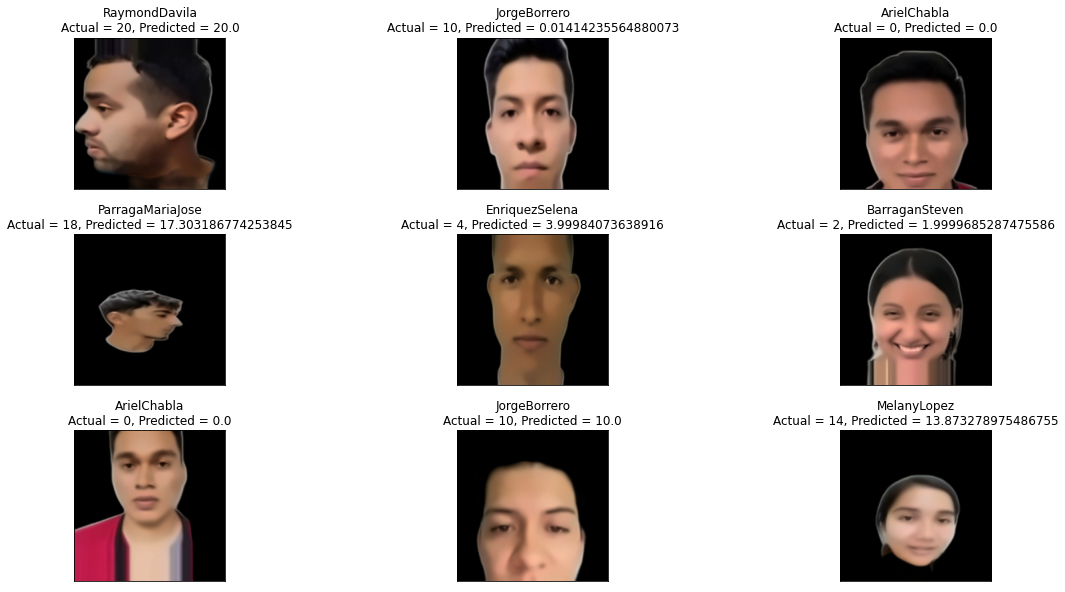

In [ ]:
#Dar el tamaño a cada imagen
plt.figure(1 , figsize = (19 , 10))
#contador
n = 0 
#for que permite mostrar un rango de imagenes
for i in range(9):
    #aumento de contador
    n += 1 
    #Imagen aleatoria de la ruta
    r = np.random.randint( 0, test_ds.shape[0], 1)
    #Mostrar imagen de forma 3x3
    plt.subplot(3, 3, n)
    #Espaciado de la imagen
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    #Mostrar las imagenes actuales
    plt.imshow(test_ds[r[0]])
    #Agregar un titulo a cada imagen
    plt.title(class_names[test_labels[r[0]]]+'\nActual = {}, Predicted = {}'.format(test_labels[r[0]] ,
             test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    #Medida de imagen x e y
    plt.xticks([]) , plt.yticks([])
    #Mostrar las imagenes
plt.show()

In [ ]:
#Convertir modelo a tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)